In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.exposure import histogram, cumulative_distribution
from skimage import img_as_ubyte, img_as_float
from scipy.stats import norm

face_cascade = cv2.CascadeClassifier('C:\\Users\\swast\\Jupyter Codes\\models\\haarcascade_frontalface_default.xml')


# Frame Capture

In [28]:
import cv2
cap = cv2.VideoCapture("C:\\Users\\swast\\Jupyter Codes\\sample.mp4")
i = 0
while(1):
    ret, frame = cap.read()
    if ret == False:
        break
    
    cv2.imshow('Color',frame)
    
    cv2.imwrite('Frame'+str(i)+'.jpg', frame)
    i+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [2]:
c = int(input("Enter Webcam no: "))

capture = cv2.VideoCapture(c)

cod = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('out.avi',cod,20.0,(640,480))
f = 0
img = []
drtn = 0
while True:
    
    ret,color_img =capture.read()
    cv2.imshow('Frames',color_img)

    if(f == 0):
        ret,color_img =capture.read()
        time.sleep(5)
        start = time.time()
        ret,color_img =capture.read()
        cv2.imshow('Frames',color_img)

    cv2.imwrite('Frame'+str(f)+'.jpg', color_img)
    f += 1

    if cv2.waitKey(1) & 0xFF == ord('q'):
        drtn = (time.time() - start)
        break
    
        
capture.release()
cv2.destroyAllWindows()

Enter Webcam no: 0


In [5]:
f

369

In [6]:
import os
import numpy as np
import cv2
bgr = np.zeros((f,4))
R = []
G = []
B = []

for k in range(f):

        
    img = cv2.imread('C:\\Users\\swast\\Jupyter Codes\\Frame'+str(k)+'.jpg')  #Start from number 1
#     print('frame'+str(k)+'.jpg')
#     clear_output(wait=True)
#     try:
#         os.remove('C:\\Users\\swast\\Jupyter Codes\\Frame'+str(k)+'.jpg')
#     except:
#         break
            
    h, w, c = img.shape

    l=0
    b_ave=0; g_ave=0; r_ave=0

    rCh = img[:,:,0]
    gCh = img[:,:,1]
    bCh = img[:,:,2]
    
    R.append(np.mean(rCh))
    G.append(np.mean(gCh))
    B.append(np.mean(bCh))

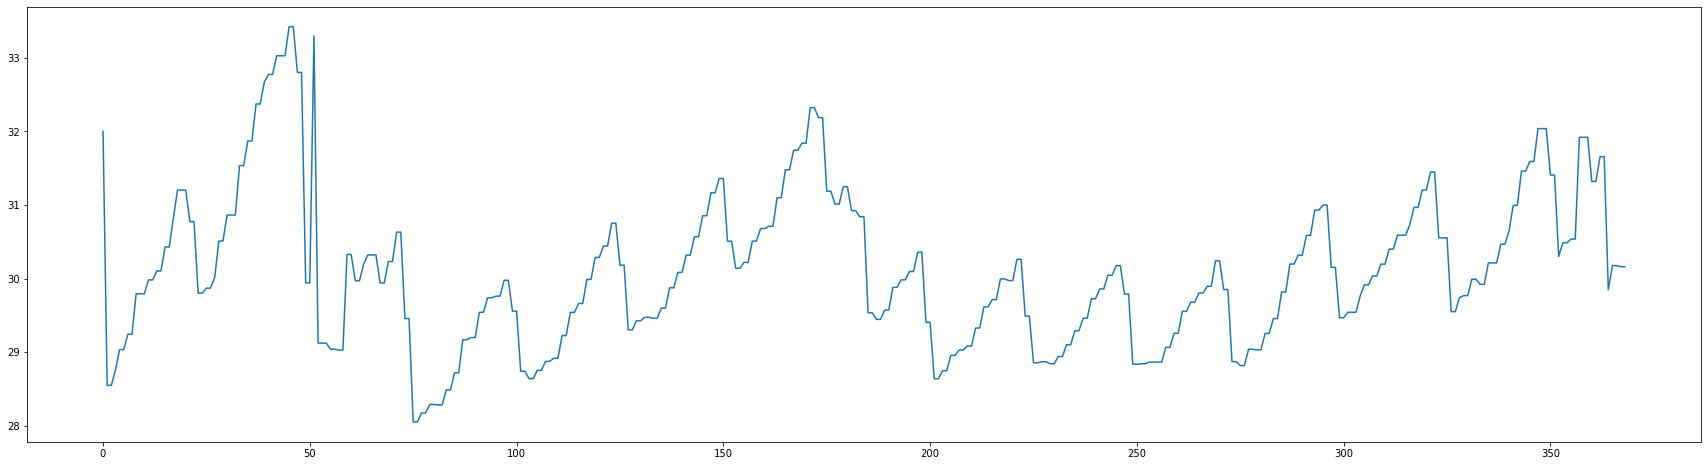

In [7]:
ff = plt.figure()
ff.set_figwidth(30)
ff.set_figheight(8)
plt.plot(R)
# R = R[30:]


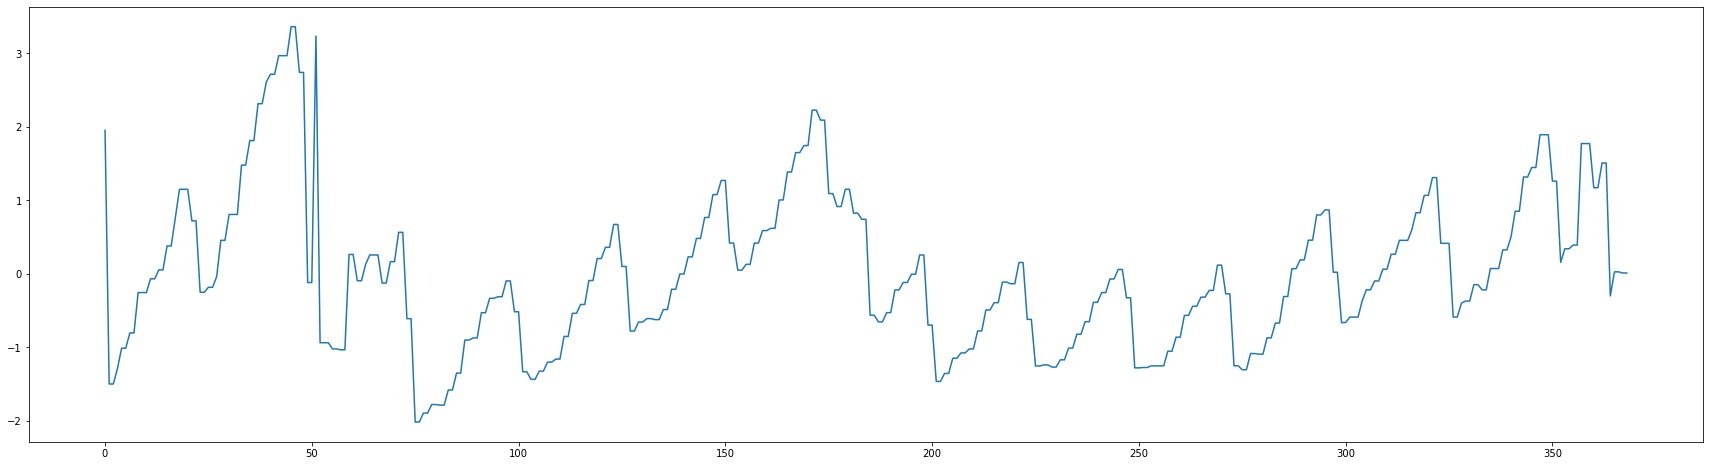

In [8]:
from scipy import signal
R = signal.detrend(R)
ff = plt.figure()
ff.set_figwidth(30)
ff.set_figheight(8)
plt.plot(R)

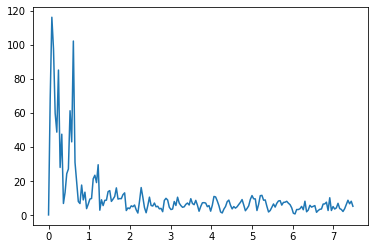

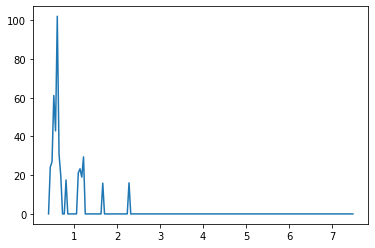

In [25]:
from scipy.fft import rfft, irfft, rfftfreq
import matplotlib.pyplot as plt
# Note the extra 'r' at the front
yf = rfft(R)
SAMPLE_RATE = len(yf)//drtn
N = len(R)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

yf_abs      = np.abs(yf)

indices     = yf_abs>15   # filter out those value under x
yf_clean    = indices * rfft(R) # noise frequency will be set to 0
plt.plot(xf[10:],np.abs(yf_clean)[10:])

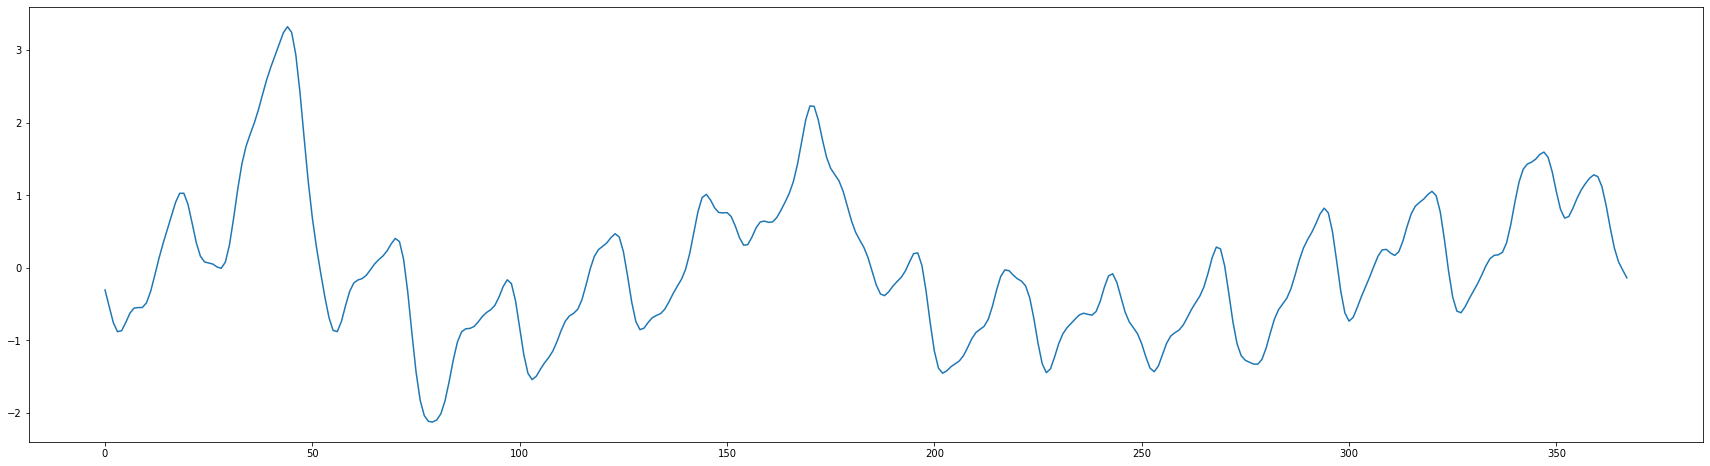

In [26]:
new_sig = irfft(yf_clean)

ff = plt.figure()
ff.set_figwidth(30)
ff.set_figheight(8)
plt.plot(new_sig)
# plt.plot(R)

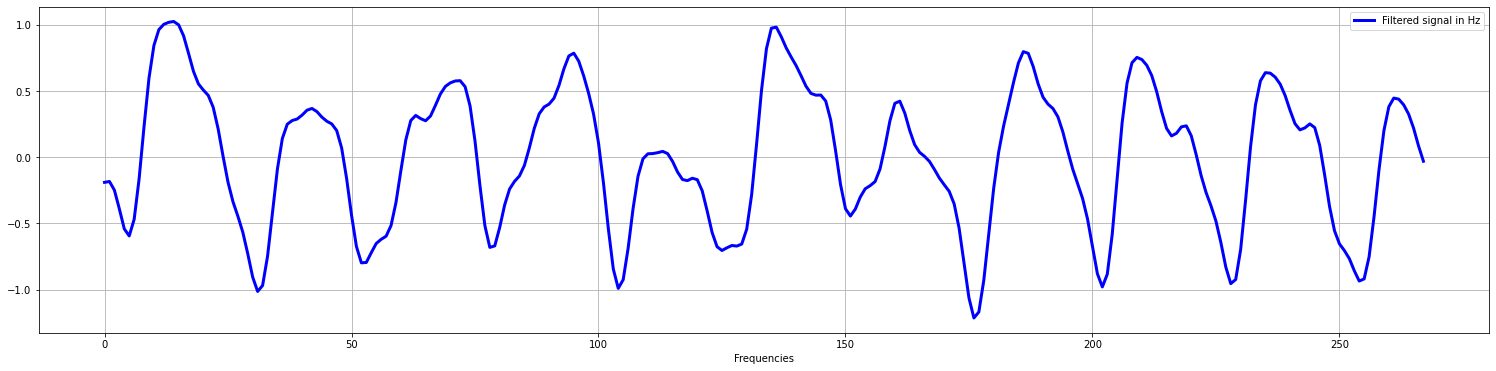

In [27]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

#         Sample rate and desired cutoff frequencies (in Hz).
    fs = f//drtn
    lowcut =0.5
    highcut = 5

#         Filter a noisy signal.
    f0 =highcut - lowcut
#     x = np.linespace
    y = butter_bandpass_filter(new_sig[0:], lowcut, highcut, fs, order=6)
    ff = plt.figure()
    ff.set_figwidth(26)
    ff.set_figheight(6)
    plt.plot(y[100:],lw = 3, label='Filtered signal in Hz', color = 'blue')
    plt.xlabel('Frequencies')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()


In [48]:
import cv2
import time
# Opens the inbuilt camera of laptop to capture video.
cap = cv2.VideoCapture("C:\\Users\\swast\\Jupyter Codes\\VID_20220904_224610.mp4")
i = 0
start = time.time()
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    
    cv2.imshow('Color',frame)
    
    cv2.imwrite('Frame'+str(i)+'.jpg', frame)
    i+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
print(f'{time.time() - start} seconds')
cap.release() 
cv2.destroyAllWindows()


0.0 seconds


# ROI Selection

In [9]:
import os
from IPython.display import clear_output
import cv2

for k in range(i):
    color_img = cv2.imread('C:\\Users\\swast\\Jupyter Codes\\data\\frame'+str(k)+'.jpg')
    print('frame'+str(k)+'.jpg')
    clear_output(wait=True)
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray_img)
    
    if(len(faces) >1):
        k+=1
        continue
        
    for (x,y,w,h) in faces:
        face_gray = gray_img[y:y+h, x:x+h]
        face_color = color_img[y:y+h, x:x+w]
        
        h = h//3 - 15
        x += 15
        w -= 38
        img = color_img[y:y+h,x:x+w]
        
#     cv2.imshow('img',img)

    cv2.imwrite('Frame'+str(k)+'.jpg', img)
    k += 1

In [8]:
drtn

61.80162715911865

# Color Average

In [3]:
import os
from IPython.display import clear_output
bgr = np.zeros((f,4))
R = []
G = []
B = []
for k in range(f):
    img = cv2.imread('C:\\Users\\swast\\Jupyter Codes\\moule\\frame'+str(k)+'.jpg')  #Start from number 1
    print('frame'+str(k)+'.jpg')
    clear_output(wait=True)
#     try:
#         os.remove('C:\\Users\\swast\\Jupyter Codes\\frame'+str(k)+'.jpg')
#     except:
#         break
            
    h, w, c = img.shape #height, width, channnel

    #Initialize
    l=0
    b_ave=0; g_ave=0; r_ave=0

    rCh = img[:,:,0]
    gCh = img[:,:,1]
    bCh = img[:,:,2]
    
    R.append(np.mean(rCh))
    G.append(np.mean(gCh))
    B.append(np.mean(bCh))

frame1229.jpg


# Variance

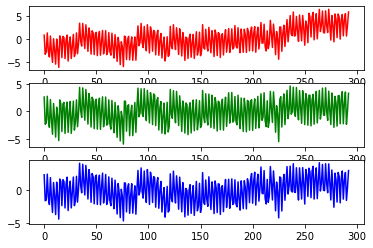

In [10]:

nR = (R - np.mean(R)) #/np.var(R)
nG = (G - np.mean(G)) #/np.var(G)
nB = (B - np.mean(B)) #/np.var(B)

plt.figure()
plt.subplot(3,1,1)
plt.plot(nR,color='red')
plt.subplot(3,1,2)
plt.plot(nG,color= 'Green')
plt.subplot(3,1,3)
plt.plot(nB, color='blue')

# Deetrend & Plot

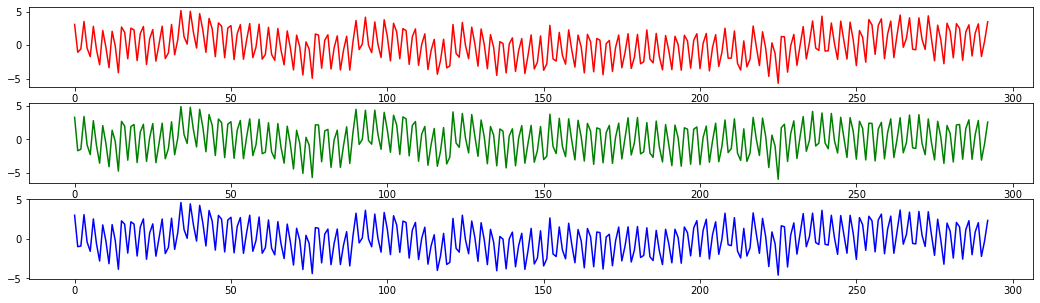

In [11]:
from scipy import signal

nR = signal.detrend(nR)
nG = signal.detrend(nG)
nB = signal.detrend(nB)
fig, ax = plt.subplots(3, 1, figsize=[18, 5],)
ax[0].plot((nR),color='red')

ax[1].plot((nG),color= 'Green')

ax[2].plot((nB), color='blue')


# Moving Average

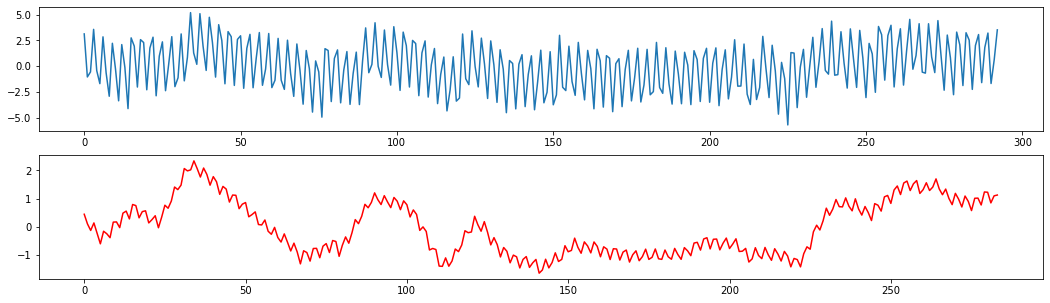

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

fig, ax = plt.subplots(2, 1, figsize=[18, 5],)
ax[0].plot(nR)

MA_nR = running_mean(nR, 10)

ax[1].plot(MA_nR,'r')

# IIR Filter

In [13]:

import numpy as np
import scipy.signal as signal

class IIR2Filter(object):           
    
    def createCoeffs(self,order,cutoff,filterType,design='butter',rp=1,rs=1,fs=0):
        
        #defining the acceptable inputs for the design and filterType params
        self.designs = ['butter','cheby1','cheby2']
        self.filterTypes1 = ['lowpass','highpass','Lowpass','Highpass','low','high']
        self.filterTypes2 = ['bandstop','bandpass','Bandstop','Bandpass']
        
        #Error handling: other errors can arise too, but those are dealt with 
        #in the signal package.
        self.isThereAnError = 1 #if there was no error then it will be set to 0
        self.COEFFS = [0] #with no error this will hold the coefficients
        
        if design not in self.designs:
            print('Gave wrong filter design! Remember: butter, cheby1, cheby2.')
        elif filterType not in self.filterTypes1 and filterType not in self.filterTypes2:
            print('Gave wrong filter type! Remember: lowpass, highpass', 
                  ', bandpass, bandstop.')
        elif fs < 0:
            print('The sampling frequency has to be positive!')
        else:
            self.isThereAnError = 0
        
        #if fs was given then the given cutoffs need to be normalised to Nyquist
        if fs and self.isThereAnError == 0:
            for i in range(len(cutoff)):
                cutoff[i] = cutoff[i]/fs*2
        
        if design == 'butter' and self.isThereAnError == 0:
            self.COEFFS = signal.butter(order,cutoff,filterType,output='sos')
        elif design == 'cheby1' and self.isThereAnError == 0:
            self.COEFFS = signal.cheby1(order,rp,cutoff,filterType,output='sos')
        elif design == 'cheby2' and self.isThereAnError == 0:
            self.COEFFS = signal.cheby2(order,rs,cutoff,filterType,output='sos')
        
        return self.COEFFS
        
    def __init__(self,order,cutoff,filterType,design='butter',rp=1,rs=1,fs=0):
        self.COEFFS = self.createCoeffs(order,cutoff,filterType,design,rp,rs,fs)
        self.acc_input = np.zeros(len(self.COEFFS))
        self.acc_output = np.zeros(len(self.COEFFS))
        self.buffer1 = np.zeros(len(self.COEFFS))
        self.buffer2 = np.zeros(len(self.COEFFS))
        self.input = 0
        self.output = 0

        
        
    def filter(self,input):

        #len(COEFFS[0,:] == 1 means that there was an error in the generation 
        #of the coefficients and the filtering should not be used
        if len(self.COEFFS[0,:]) > 1:
        
            self.input = input
            self.output = 0
            
            #The for loop creates a chain of second order filters according to 
            #the order desired. If a 10th order filter is to be created the 
            #loop will iterate 5 times to create a chain of 5 second order 
            #filters.
            for i in range(len(self.COEFFS)):
                
                
                self.FIRCOEFFS = self.COEFFS[i][0:3]
                self.IIRCOEFFS = self.COEFFS[i][3:6]
                
                #Calculating the accumulated input consisting of the input and 
                #the values coming from the feedbaack loops (delay buffers 
                #weighed by the IIR coefficients).
                self.acc_input[i] = (self.input + self.buffer1[i] 
                * -self.IIRCOEFFS[1] + self.buffer2[i] * -self.IIRCOEFFS[2])
                    
                #Calculating the accumulated output provided by the accumulated
                #input and the values from the delay bufferes weighed by the 
                #FIR coefficients.
                self.acc_output[i] = (self.acc_input[i] * self.FIRCOEFFS[0]
                + self.buffer1[i] * self.FIRCOEFFS[1] + self.buffer2[i] 
                * self.FIRCOEFFS[2])
                
                #Shifting the values on the delay line: acc_input->buffer1->
                #buffer2
                self.buffer2[i] = self.buffer1[i]
                self.buffer1[i] = self.acc_input[i]
                
                self.input = self.acc_output[i]
            
            self.output = self.acc_output[i]
                
        return self.output
    

In [14]:
FilterMains = IIR2Filter(5,[10,20],'bandstop',design='cheby1',rp=2,fs=1000)
mySignalFiltered=[0]*len(MA_nR)
for i in range(len(MA_nR)):
    mySignalFiltered[i] = FilterMains.filter(MA_nR[i])

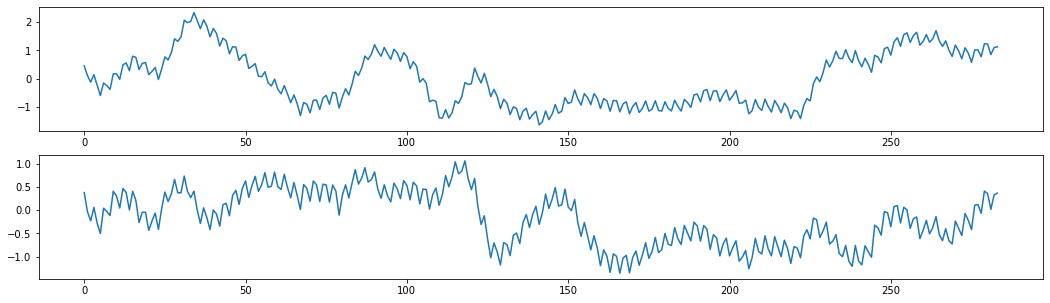

In [15]:
fig, ax = plt.subplots(2, 1, figsize=[18, 5],)
ax[0].plot(MA_nR)
ax[1].plot(mySignalFiltered)

# ICA

In [16]:
def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean
    return centered, mean

def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    n = np.shape(x)[1] - 1
    m = x - mean

    return (m.dot(m.T))/n

def whiten(x):
    # Calculate the covariance matrix
    coVarM = covariance(X)

    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)

    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))

    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))

    # Project onto whitening matrix
    Xw = np.dot(whiteM, X)

    return Xw, whiteM

def fastIca(signals,  alpha = 1, thresh=1e-8, iterations=5000):
    m, n = signals.shape

    # Initialize random weights
    W = np.random.rand(m, m)

    for c in range(m):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())

            i = 0
            lim = 100
            while ((lim > thresh) & (i < iterations)):

                # Dot product of weight and signal
                ws = np.dot(w.T, signals)

                # Pass w*s into contrast function g
                wg = np.tanh(ws * alpha).T

                # Pass w*s into g prime
                wg_ = (1 - np.square(np.tanh(ws))) * alpha

                # Update weights
                wNew = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()

                # Decorrelate weights              
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt((wNew ** 2).sum())

                # Calculate limit condition
                lim = np.abs(np.abs((wNew * w).sum()) - 1)

                # Update weights
                w = wNew

                # Update counter
                i += 1

            W[c, :] = w.T
    return W

#---------
X = (np.c_[nG[:1221],nB[:1221],mySignalFiltered]).T
#---------
# Center signals
Xc, meanX = center(X)

# Whiten mixed signals
Xw, whiteM = whiten(Xc)

W = fastIca(Xw,  alpha=1)

#Un-mix signals using
unMixed = Xw.T.dot(W.T)

# Subtract mean
unMixed = (unMixed.T - meanX).T


colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
for i in range(3):
    ax.plot(X[i], lw = 2, color = colors[i])
ax.tick_params(labelsize=12)
ax.set_title('mixed signals', fontsize=25)
# ax.set_xlim(0, 10)

fig, ax = plt.subplots(1, 1, figsize=[18, 5],)
for i in range(3):
    ax.plot(unMixed.T[i], lw = 2, color = colors[i])
ax.set_ylabel("Amplitude", fontsize = 10)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
# ax.set_xlim(0, 100)

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 293 and the array at index 2 has size 284

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[30,5])
plt.plot(unMixed.T[2])

In [17]:
array = (unMixed.T[2])
FilterMains = IIR2Filter(10,[1,5],'bandstop',design='cheby1',rp=2,fs=1000)
ppg=[0]*len(unMixed.T[2])
for i in range(len(array)):
    ppg[i] = FilterMains.filter(array[i])

NameError: name 'unMixed' is not defined

NameError: name 'ppg' is not defined

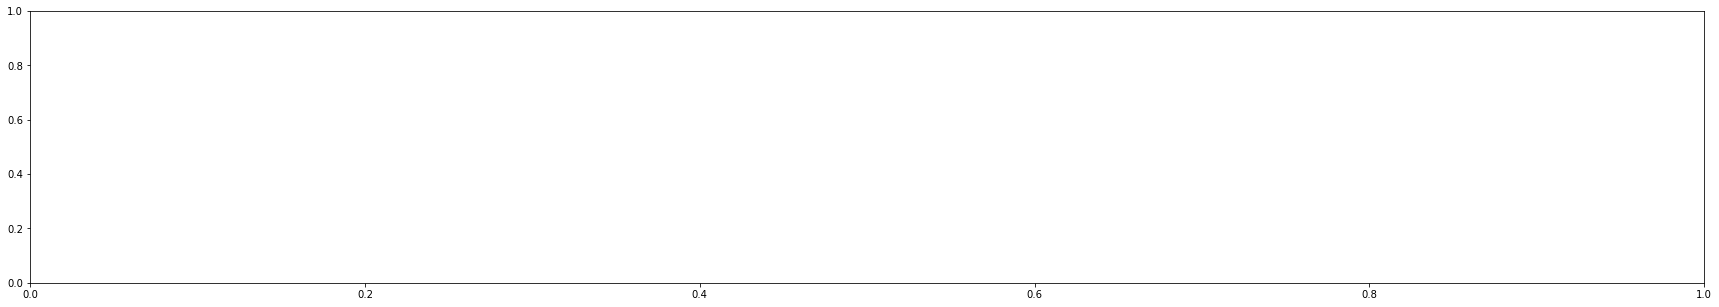

In [18]:
fig, ax = plt.subplots(1, 1, figsize=[30,5])
plt.plot(ppg[:])

In [19]:
from scipy.fftpack import fft
N = f
FPS = f//61
if(FPS == 0):
    FPS = 1

sig = unMixed[:,2]
xf_b = FPS * (np.arange(int(N/2))/N)
yf = np.abs(fft(sig))
yf_b = (1/FPS)* yf[range(int(int(N)/2))]

fig, ax = plt.subplots()
ax.plot(xf_b, yf_b, color = 'blue')
ax.set_title("FFT of red channel")
ax.set_xlabel("frequencies in Hz")
ax.set_ylabel("Amplitude")
plt.show()

NameError: name 'unMixed' is not defined

In [20]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

#         Sample rate and desired cutoff frequencies (in Hz).
    fs = 12
    lowcut =0.5
    highcut = 5

#         Filter a noisy signal.
    f0 =highcut - lowcut

    y = butter_bandpass_filter(yf_b[:], lowcut, highcut, fs, order=6)
    ff = plt.figure()
    ff.set_figwidth(26)
    ff.set_figheight(6)
    plt.plot(xf_b[60:], y[60:],lw = 4, label='Filtered signal in Hz', color = 'blue')
    plt.xlabel('Frequencies')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()


NameError: name 'yf_b' is not defined